In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [43]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2025ML+DL Programming/dataset/WISDM.csv", sep=r",", header=None,
                 names=["Sample", "ActivityID", "Activity", "Timestamp", "X", "Y", "Z"])

In [44]:
df

,Sample,ActivityID,Activity,Timestamp,X,Y,Z
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
...,...,...,...,...,...,...,...
1048570,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048571,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048572,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048573,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [45]:
df.shape

(1048575, 7)

In [46]:
# 결측치 홗인
df.isnull().values.any()

np.False_

In [47]:
# ✅ Jogging과 Sitting만 남기기
df = df[df["Activity"].isin(["Jogging", "Sitting"])]

In [55]:
df

,Sample,ActivityID,Activity,Timestamp,X,Y,Z,Class
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953,0
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424,0
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722,0
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717,0
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164,0
...,...,...,...,...,...,...,...,...
1036605,1036606,7,Jogging,2.082540e+14,1.420000,-2.340000,1.950000,0
1036606,1036607,7,Jogging,2.082540e+14,-0.800000,0.230000,0.950000,0
1036607,1036608,7,Jogging,2.082540e+14,-0.110000,9.110000,-0.930000,0
1036608,1036609,7,Jogging,2.082540e+14,-2.560000,20.040000,0.080000,0


In [56]:
df.drop(["ActivityID"], axis=1, inplace=True)

/tmp/ipython-input-2584673381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["ActivityID"], axis=1, inplace=True)


In [57]:
df

,Sample,Activity,Timestamp,X,Y,Z,Class
0,0,Jogging,4.910600e+13,-0.694638,12.680544,0.503953,0
1,1,Jogging,4.910610e+13,5.012288,11.264028,0.953424,0
2,2,Jogging,4.910610e+13,4.903325,10.882658,-0.081722,0
3,3,Jogging,4.910620e+13,-0.612916,18.496431,3.023717,0
4,4,Jogging,4.910630e+13,-1.184970,12.108489,7.205164,0
...,...,...,...,...,...,...,...
1036605,1036606,Jogging,2.082540e+14,1.420000,-2.340000,1.950000,0
1036606,1036607,Jogging,2.082540e+14,-0.800000,0.230000,0.950000,0
1036607,1036608,Jogging,2.082540e+14,-0.110000,9.110000,-0.930000,0
1036608,1036609,Jogging,2.082540e+14,-2.560000,20.040000,0.080000,0


In [58]:
LABELS = ["Jogging", "Sitting"]

/tmp/ipython-input-2436629192.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_activities = pd.value_counts(df['Activity'], sort=True)


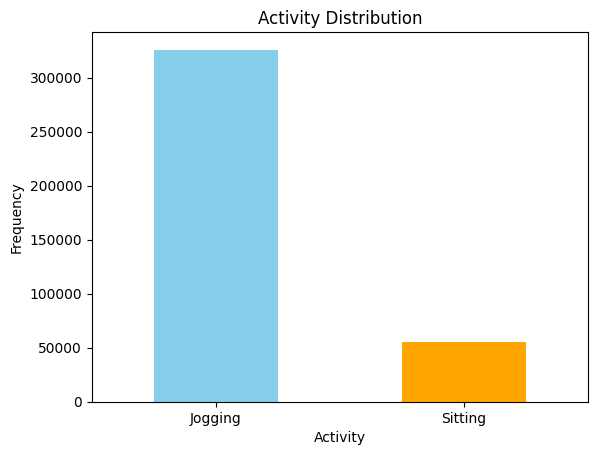

In [59]:
count_activities = pd.value_counts(df['Activity'], sort=True)
count_activities.plot(kind='bar', rot=0, color=['skyblue', 'orange'])
plt.title("Activity Distribution")
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel("Activity")
plt.ylabel("Frequency")
plt.show()

In [60]:
df["Class"] = df["Activity"].map({
    "Jogging": 0,
    "Sitting": 1
})

/tmp/ipython-input-3037102679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = df["Activity"].map({


In [61]:
df

,Sample,Activity,Timestamp,X,Y,Z,Class
0,0,Jogging,4.910600e+13,-0.694638,12.680544,0.503953,0
1,1,Jogging,4.910610e+13,5.012288,11.264028,0.953424,0
2,2,Jogging,4.910610e+13,4.903325,10.882658,-0.081722,0
3,3,Jogging,4.910620e+13,-0.612916,18.496431,3.023717,0
4,4,Jogging,4.910630e+13,-1.184970,12.108489,7.205164,0
...,...,...,...,...,...,...,...
1036605,1036606,Jogging,2.082540e+14,1.420000,-2.340000,1.950000,0
1036606,1036607,Jogging,2.082540e+14,-0.800000,0.230000,0.950000,0
1036607,1036608,Jogging,2.082540e+14,-0.110000,9.110000,-0.930000,0
1036608,1036609,Jogging,2.082540e+14,-2.560000,20.040000,0.080000,0


In [65]:
jogging = df[df["Activity"] == "Jogging"]
sitting = df[df["Activity"] == "Sitting"]
sitting.shape

(54876, 7)

In [66]:
jogging.shape

(325975, 7)

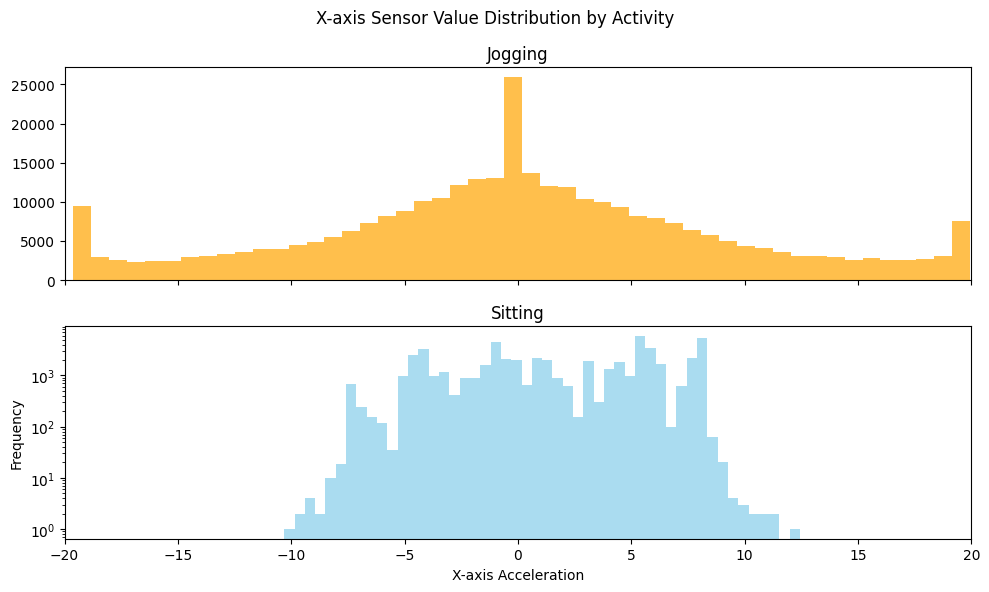

In [68]:
import matplotlib.pyplot as plt

# 두 활동별 X축 센서값 분포 비교
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
f.suptitle('X-axis Sensor Value Distribution by Activity')

bins = 50

# Jogging의 X값 히스토그램
ax1.hist(jogging["X"], bins=bins, color='orange', alpha=0.7)
ax1.set_title('Jogging')

# Sitting의 X값 히스토그램
ax2.hist(sitting["X"], bins=bins, color='skyblue', alpha=0.7)
ax2.set_title('Sitting')

plt.xlabel('X-axis Acceleration')
plt.ylabel('Frequency')
plt.xlim((-20, 20))   # 센서값 범위에 맞게 조정
plt.yscale('log')     # 로그 스케일로 보기 쉽게
plt.tight_layout()
plt.show()


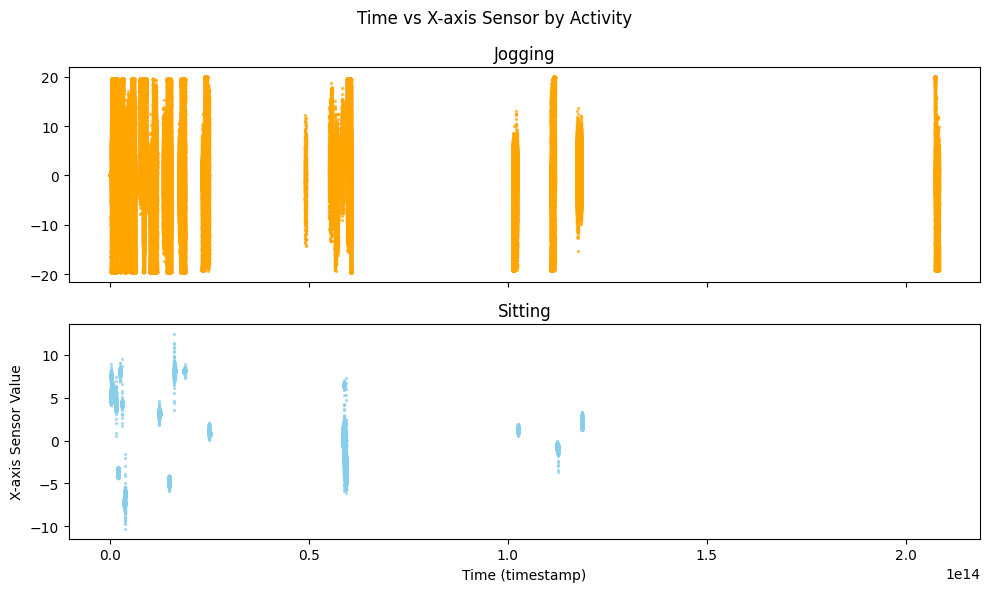

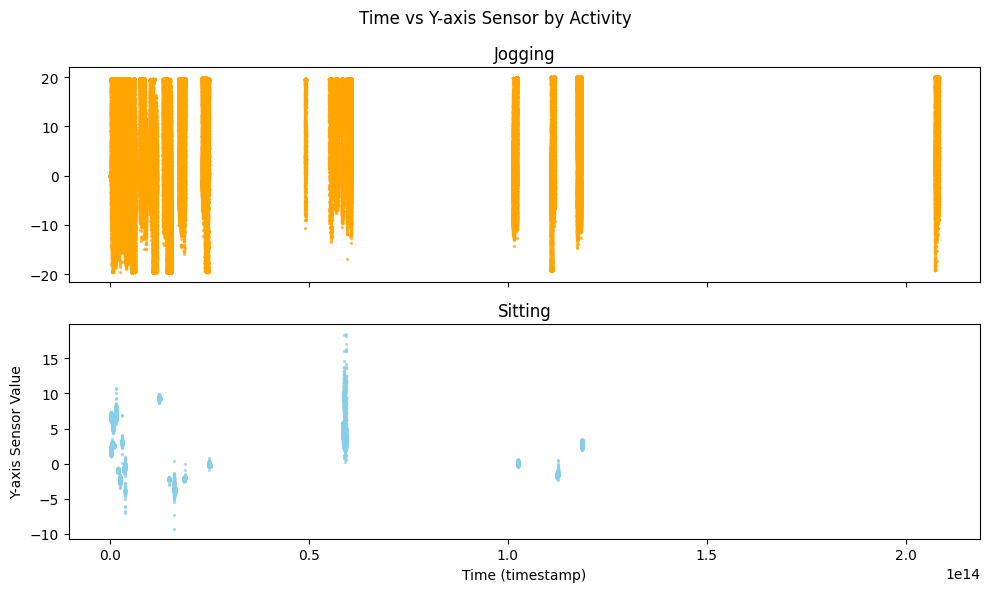

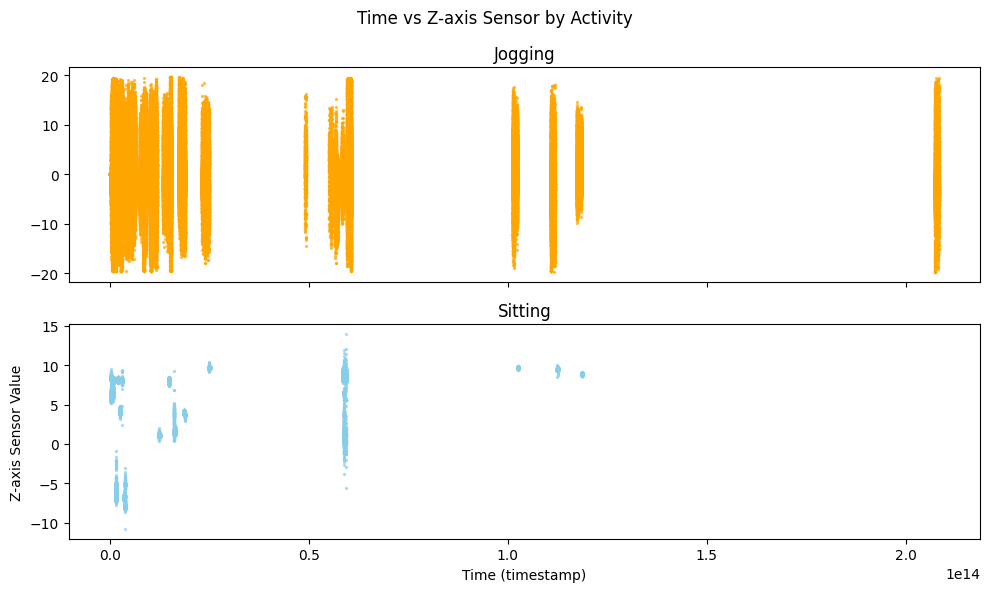

In [71]:
import matplotlib.pyplot as plt

for axis in ["X", "Y", "Z"]:
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
    f.suptitle(f'Time vs {axis}-axis Sensor by Activity')

    ax1.scatter(jogging["Timestamp"], jogging[axis], s=2, alpha=0.6, color='orange')
    ax1.set_title('Jogging')

    ax2.scatter(sitting["Timestamp"], sitting[axis], s=2, alpha=0.6, color='skyblue')
    ax2.set_title('Sitting')

    plt.xlabel('Time (timestamp)')
    plt.ylabel(f'{axis}-axis Sensor Value')
    plt.tight_layout()
    plt.show()


In [86]:
from sklearn.preprocessing import StandardScaler

# Timestamp는 시간 정보이므로 학습에서 제외
data = df.drop(['Timestamp', 'Activity', 'Sample'], axis=1)

# X, Y, Z 센서값을 표준화 (평균=0, 표준편차=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['X', 'Y', 'Z']])

# 스케일링 결과를 DataFrame으로 다시 묶기
data[['X', 'Y', 'Z']] = scaled_features

print(data.head())

          X         Y         Z  Class
0 -0.114670  0.867412 -0.064136      0
1  0.556344  0.704064  0.009100      0
2  0.543532  0.660086 -0.159564      0
3 -0.105062  1.538080  0.346429      0
4 -0.172323  0.801444  1.027745      0


In [ ]:
# 모델을 오직 정상 거래기록으로만 훈련
# 정상 거래기록을 테스트셋에 넣으면 모델의 성능을 평가

In [88]:
RANDOM_SEED = 42

In [89]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(260847, 3)

In [ ]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임

In [90]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# AutoEncoder 구조 설정
input_dim = X_train.shape[1]   # = 3 (X, Y, Z)
encoding_dim = 2               # 잠재공간 차원 (적당히 작게 설정)

input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)  # 표준화된 센서값 → linear 출력

# Model 정의
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Optimizer 및 Loss 설정
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 요약 출력
autoencoder.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_split = 0.1,
                          verbose = 1)


Epoch 1/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.5974 - val_loss: 0.2990
Epoch 2/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2962 - val_loss: 0.2848
Epoch 3/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2751 - val_loss: 0.2278
Epoch 4/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2225 - val_loss: 0.1999
Epoch 5/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1979 - val_loss: 0.1849
Epoch 6/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1867 - val_loss: 0.1748
Epoch 7/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1739 - val_loss: 0.1649
Epoch 8/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1651 - val_loss: 0.1596
Epoch 9/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.1605 - val_loss: 0.1554
Epoch 10/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1561 - val_loss: 0.1525
Epoch 11/50
1835/1835 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1550 - val_loss: 0.1514
Epoch 12/50
1835/1835 ━━━━━━━━

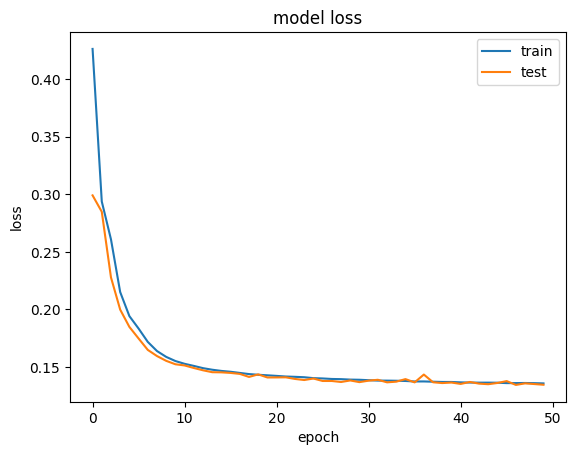

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [93]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,reconstruction_error,true_class
count,76171.000000,76171.000000
mean,0.139145,0.144976
std,0.257718,0.352079
min,0.000035,0.000000
25%,0.020140,0.000000
50%,0.066558,0.000000
75%,0.145201,0.000000
max,5.902661,1.000000


In [94]:
error_df.head()

,reconstruction_error,true_class
106873,0.231724,0
125283,0.187836,0
634103,0.157611,0
198929,0.004269,0
422861,0.045689,0


In [103]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 0.4

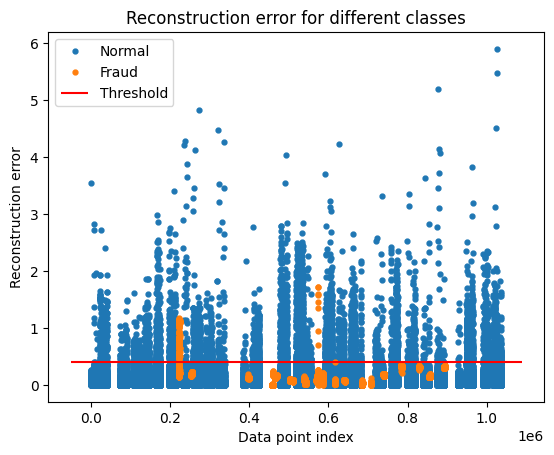

In [104]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

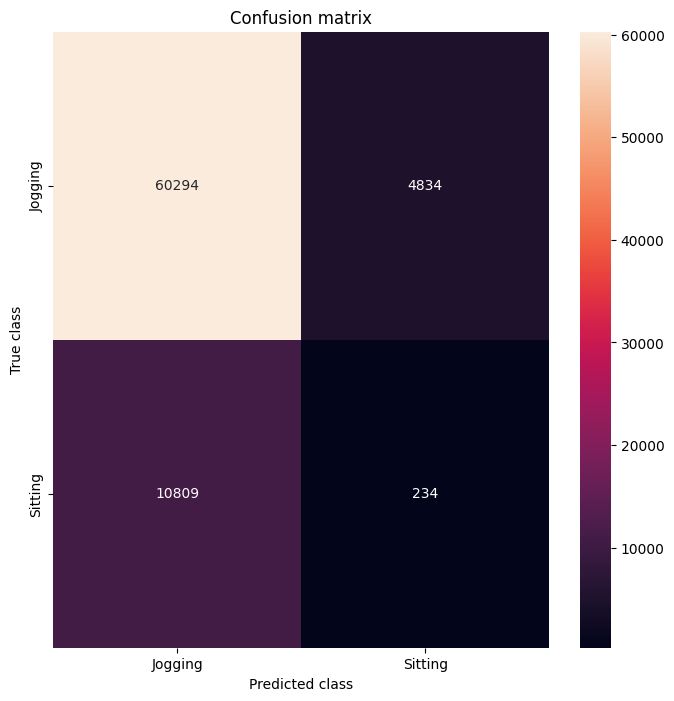

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     65128
           1       0.05      0.02      0.03     11043

    accuracy                           0.79     76171
   macro avg       0.45      0.47      0.46     76171
weighted avg       0.73      0.79      0.76     76171



In [105]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))